In [0]:
from keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [10]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
trans = ["飛機", "汽車", "鳥", "貓",
         "鹿", "狗", "青蛙", "馬",
         "船", "卡車"]

是什麼? 船


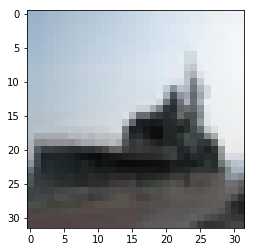

In [12]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, 49999)
print("是什麼?", trans[y_train[c][0]])
plt.imshow(x_train[c])

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense
cnn = Sequential()
# CNN
cnn.add(Conv2D(64, (3, 3), padding="same", activation="relu", input_shape=(32, 32, 3)))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(512, (3, 3), padding="same", activation="relu"))
cnn.add(Flatten())
# MLP
cnn.add(Dense(1024, activation="relu"))
cnn.add(Dense(256, activation="relu"))
cnn.add(Dense(10, activation="softmax"))
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 512)         1180160   
__________

In [14]:
from keras.utils.np_utils import to_categorical
# 圖片: 0~1
x_train_norm = x_train / 255
x_test_norm = x_test / 255
# 答案: 10個機率(One-hot Encoding)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print(y_train[0])
print(y_train_cat[0])

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
cnn.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

In [16]:
cnn.fit(x_train_norm, y_train_cat,
        batch_size=200, epochs=7,
        validation_split=0.1, verbose=2)

Train on 45000 samples, validate on 5000 samples
Epoch 1/7
 - 15s - loss: 1.6614 - acc: 0.3824 - val_loss: 1.2729 - val_acc: 0.5288
Epoch 2/7
 - 14s - loss: 1.1165 - acc: 0.5979 - val_loss: 0.9323 - val_acc: 0.6736
Epoch 3/7
 - 14s - loss: 0.8548 - acc: 0.6966 - val_loss: 0.8197 - val_acc: 0.7132
Epoch 4/7
 - 14s - loss: 0.6809 - acc: 0.7606 - val_loss: 0.7803 - val_acc: 0.7388
Epoch 5/7
 - 14s - loss: 0.5522 - acc: 0.8056 - val_loss: 0.7039 - val_acc: 0.7644
Epoch 6/7
 - 14s - loss: 0.4332 - acc: 0.8487 - val_loss: 0.7403 - val_acc: 0.7608
Epoch 7/7
 - 14s - loss: 0.3189 - acc: 0.8881 - val_loss: 0.7661 - val_acc: 0.7648


In [17]:
cnn.evaluate(x_test_norm, y_test_cat)

10000/10000 [==============================] - 3s 252us/step


[0.8172800206184387, 0.7548]

In [19]:
from sklearn.metrics import confusion_matrix
import pandas as pd
pre = cnn.predict_classes(x_test_norm)
pd.DataFrame(confusion_matrix(y_test, pre),
             columns=trans,
             index=trans)

,飛機,汽車,鳥,貓,鹿,狗,青蛙,馬,船,卡車
飛機,760,5,84,26,18,8,12,7,58,22
汽車,25,829,13,7,5,1,17,4,31,68
鳥,41,3,717,36,71,39,74,14,1,4
貓,13,7,103,492,75,165,102,29,2,12
鹿,13,2,80,39,743,27,60,33,1,2
狗,4,2,66,119,50,657,48,44,6,4
青蛙,5,0,38,21,18,13,899,3,1,2
馬,10,2,39,30,71,44,11,786,1,6
船,65,12,20,23,9,4,8,4,834,21
卡車,33,50,16,11,3,8,13,10,25,831


In [26]:
cnn.predict_classes(x_test_norm)

array([3, 8, 8, ..., 5, 4, 7])

In [25]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]])

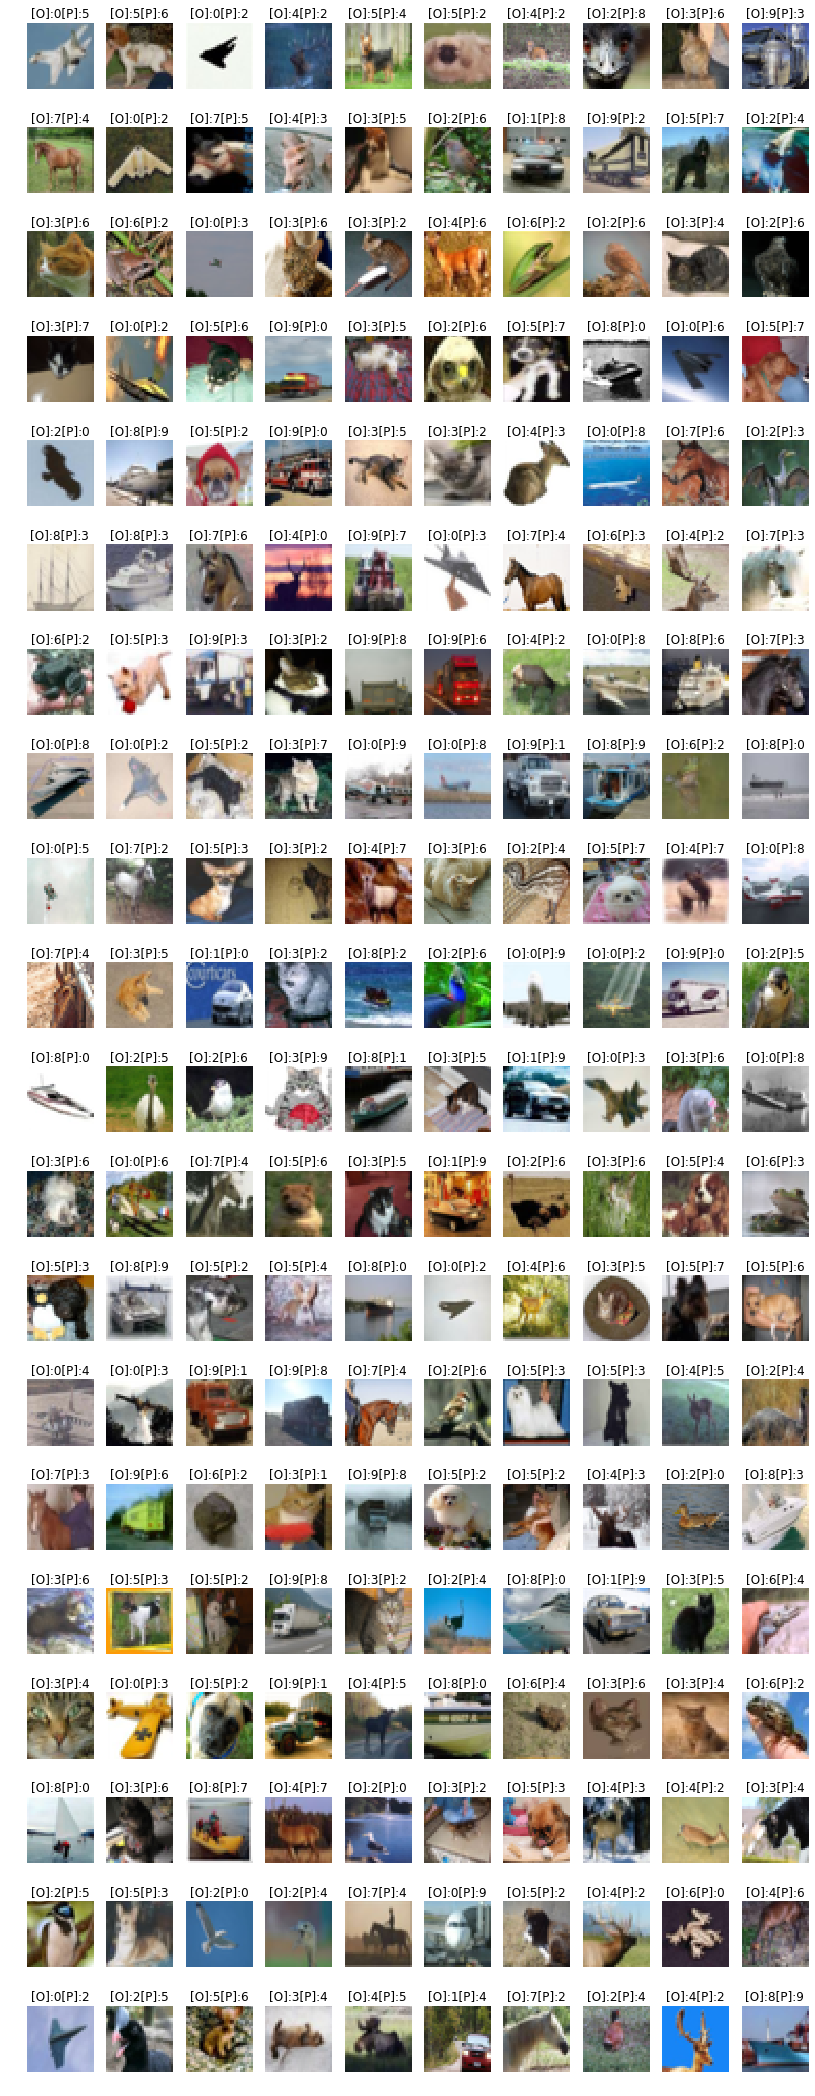

In [28]:
trans = ["飛機", "汽車", "鳥", "貓",
         "鹿", "狗", "青蛙", "馬",
         "船", "卡車"]
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
pre = cnn.predict_classes(x_test_norm)
# CNN! shape不一樣的東西是不能直接比
idx = np.nonzero(pre != y_test.reshape(10000))[0]
idx = idx[:200]
# 預測錯誤的正確標籤
false_ori_label = y_test[idx]
# 預測錯誤的預測標籤
false_pre_label = pre[idx]
# 預測錯誤的圖片本身
false_img = x_test[idx]

plt.figure(figsize=(14, 40))
width = 10
height = int(len(false_img) / width) + 1
for i, img in enumerate(false_img):
    plt.subplot(height, width, i + 1)
    msg = "[O]:" + str(false_ori_label[i][0]) + "[P]:" + str(false_pre_label[i])
    plt.title(msg)
    plt.axis("off")
    plt.imshow(img)

In [0]:
# 如果想看: https://support.hdfgroup.org/products/java/release/download.html
cnn.save("cnn.h5")

In [30]:
from keras.models import load_model
loaded = load_model("cnn.h5")
loaded.evaluate(x_test_norm, y_test_cat)

10000/10000 [==============================] - 3s 254us/step


[0.8172800206184387, 0.7548]

In [0]:
from google.colab import files
files.download('cnn.h5')